In [3]:
!pip install pandas
!pip install lxml
!pip install html5lib
!pip install BeautifulSoup4
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [73]:
import pandas as pd
#url = "https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table"
url = 'https://en.wikipedia.org/w/index.php?title=All-time_Olympic_Games_medal_table&oldid=1070338759'
#url = "https://ko.wikipedia.org/wiki/%EC%98%AC%EB%A6%BC%ED%94%BD_%EB%A9%94%EB%8B%AC_%EC%A7%91%EA%B3%84"
df = pd.read_html(url)
print(df[1])

                                             Team Summer Olympic Games  \
                                  Team (IOC code)                    №   
0                               Afghanistan (AFG)                   15   
1                                   Algeria (ALG)                   14   
2                                 Argentina (ARG)                   25   
3                                   Armenia (ARM)                    7   
4                         Australasia (ANZ) [ANZ]                    2   
..                                            ...                  ...   
151                          Zimbabwe (ZIM) [ZIM]                   14   
152      Independent Olympic Athletes (IOA) [IOA]                    3   
153  Independent Olympic Participants (IOP) [IOP]                    1   
154                        Mixed team (ZZX) [ZZX]                    3   
155                                        Totals                   32   

                                     

In [74]:
import pandas as pd
#url = "https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table"
url = 'https://en.wikipedia.org/w/index.php?title=All-time_Olympic_Games_medal_table&oldid=1070338759'
df = pd.read_html(url, header=0, index_col = 0)
print(df[1])

                                             Summer Olympic Games  \
Team                                                                
Team (IOC code)                                                 №   
Afghanistan (AFG)                                              15   
Algeria (ALG)                                                  14   
Argentina (ARG)                                                25   
Armenia (ARM)                                                   7   
...                                                           ...   
Zimbabwe (ZIM) [ZIM]                                           14   
Independent Olympic Athletes (IOA) [IOA]                        3   
Independent Olympic Participants (IOP) [IOP]                    1   
Mixed team (ZZX) [ZZX]                                          3   
Totals                                                         32   

                                              Summer Olympic Games.1  \
Team                          

In [75]:
summer = df[1].iloc[0:,:5]
summer

,Summer Olympic Games,Summer Olympic Games.1,Summer Olympic Games.2,Summer Olympic Games.3,Summer Olympic Games.4
Team,,,,,
Team (IOC code),№,NaN,NaN,NaN,Total
Afghanistan (AFG),15,0.0,0.0,2.0,2
Algeria (ALG),14,5.0,4.0,8.0,17
Argentina (ARG),25,21.0,26.0,30.0,77
Armenia (ARM),7,2.0,8.0,8.0,18
...,...,...,...,...,...
Zimbabwe (ZIM) [ZIM],14,3.0,4.0,1.0,8
Independent Olympic Athletes (IOA) [IOA],3,1.0,0.0,1.0,2
Independent Olympic Participants (IOP) [IOP],1,0.0,1.0,2.0,3


In [76]:
summer.columns = ['경기수', '금', '은', '동', '계']
print(summer)

                                             경기수       금       은       동  \
Team                                                                       
Team (IOC code)                                №     NaN     NaN     NaN   
Afghanistan (AFG)                             15     0.0     0.0     2.0   
Algeria (ALG)                                 14     5.0     4.0     8.0   
Argentina (ARG)                               25    21.0    26.0    30.0   
Armenia (ARM)                                  7     2.0     8.0     8.0   
...                                           ..     ...     ...     ...   
Zimbabwe (ZIM) [ZIM]                          14     3.0     4.0     1.0   
Independent Olympic Athletes (IOA) [IOA]       3     1.0     0.0     1.0   
Independent Olympic Participants (IOP) [IOP]   1     0.0     1.0     2.0   
Mixed team (ZZX) [ZZX]                         3    11.0     6.0     8.0   
Totals                                        32  5464.0  5427.0  5893.0   

           

In [85]:
import pandas as pd
# 최신 올림픽 위키 페이지의 경우 편집 실수로 잘못된 입력이 되어있어 HTML 파싱에 에러 발생.
# 이전 날짜 중 적당한 날짜의 페이지를 가져와서 처리(위키의 히스토리 기능 활용)
url = 'https://en.wikipedia.org/w/index.php?title=All-time_Olympic_Games_medal_table&oldid=1070338759'
df = pd.read_html(url, header=0, index_col = 0) # 헤더 제거. 하지만 헤더가 2행이라 1행 남아있음. 숫자열도 제거
summer = df[1].iloc[1:,:5] # 나머지 헤더행도 제외해서 가져오기.
summer.columns = ["경기수", "금", "은", "동", "계"]
summer = summer.sort_values("금", ascending=False)
print(summer)

                                        경기수       금       은       동      계
Team                                                                      
Totals                                   32  5464.0  5427.0  5893.0  16784
United States (USA) [P] [Q] [R] [Z] [F]  28  1060.0   831.0   738.0   2629
Soviet Union (URS) [URS]                  9   395.0   319.0   296.0   1010
Great Britain (GBR) [GBR] [Z]            29   285.0   319.0   314.0    918
China (CHN) [CHN]                        11   262.0   199.0   173.0    634
...                                      ..     ...     ...     ...    ...
North Macedonia (MKD)                     7     0.0     1.0     1.0      2
Paraguay (PAR)                           13     0.0     1.0     0.0      1
San Marino (SMR)                         15     0.0     1.0     2.0      3
Saudi Arabia (KSA)                       12     0.0     2.0     2.0      4
Lebanon (LIB)                            18     0.0     2.0     2.0      4

[156 rows x 5 columns]


In [78]:
summer.to_excel('하계올림픽메달.xlsx')

In [1]:
import pandas as pd
index = pd.date_range('1/1/2000', periods=8)
print(index)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08'],
              dtype='datetime64[ns]', freq='D')


In [2]:
import pandas as pd
index = pd.date_range('2022-01-01', periods=8)
print(index)

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08'],
              dtype='datetime64[ns]', freq='D')


In [3]:
import pandas as pd
index = pd.date_range('2022-01-01', periods=8, freq='M')
print(index)

DatetimeIndex(['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31'],
              dtype='datetime64[ns]', freq='M')


In [6]:
import pandas as pd
import numpy as np
index = pd.date_range('2022-01-01', periods=8, freq='D')
df = pd.DataFrame(np.random.rand(8,3), index=index, columns=list('ABC'))
df

,A,B,C
2022-01-01,0.162675,0.333444,0.629259
2022-01-02,0.712520,0.272379,0.349200
2022-01-03,0.226277,0.418445,0.983359
2022-01-04,0.626870,0.571372,0.123894
2022-01-05,0.970460,0.905244,0.691586
2022-01-06,0.131526,0.937572,0.126933
2022-01-07,0.455037,0.345282,0.810147
2022-01-08,0.299779,0.470451,0.857514


In [7]:
print(df['B'])

2022-01-01    0.333444
2022-01-02    0.272379
2022-01-03    0.418445
2022-01-04    0.571372
2022-01-05    0.905244
2022-01-06    0.937572
2022-01-07    0.345282
2022-01-08    0.470451
Freq: D, Name: B, dtype: float64


In [10]:
df2 = df['B'] > 0.4
print(df2)

2022-01-01    False
2022-01-02    False
2022-01-03     True
2022-01-04     True
2022-01-05     True
2022-01-06     True
2022-01-07    False
2022-01-08     True
Freq: D, Name: B, dtype: bool


In [11]:
df2 = df[df['B'] > 0.4]
print(df2)

                   A         B         C
2022-01-03  0.226277  0.418445  0.983359
2022-01-04  0.626870  0.571372  0.123894
2022-01-05  0.970460  0.905244  0.691586
2022-01-06  0.131526  0.937572  0.126933
2022-01-08  0.299779  0.470451  0.857514


In [12]:
df2.T

,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-08
A,0.226277,0.626870,0.970460,0.131526,0.299779
B,0.418445,0.571372,0.905244,0.937572,0.470451
C,0.983359,0.123894,0.691586,0.126933,0.857514


In [15]:
df['D'] = df['A'] / df['B']
df

,A,B,C,D
2022-01-01,0.162675,0.333444,0.629259,0.487863
2022-01-02,0.712520,0.272379,0.349200,2.615911
2022-01-03,0.226277,0.418445,0.983359,0.540756
2022-01-04,0.626870,0.571372,0.123894,1.097131
2022-01-05,0.970460,0.905244,0.691586,1.072043
2022-01-06,0.131526,0.937572,0.126933,0.140284
2022-01-07,0.455037,0.345282,0.810147,1.317872
2022-01-08,0.299779,0.470451,0.857514,0.637216


In [26]:
import numpy as np
index = pd.date_range('1/1/2000', periods = 8)
df = pd.DataFrame(np.random.rand(8,3), index=index, columns=list('ABC'))
df['D'] = df['A'] / df['B']
df['E'] = np.sum(df, axis = 1)
df.head()

,A,B,C,D,E
2000-01-01,0.904930,0.179675,0.995137,5.036487,7.116229
2000-01-02,0.489956,0.824907,0.173608,0.593953,2.082425
2000-01-03,0.371597,0.157218,0.370246,2.363580,3.262641
2000-01-04,0.482374,0.853302,0.027618,0.565303,1.928597
2000-01-05,0.781576,0.412517,0.810066,1.894651,3.898811


In [27]:
print(np.sum(df, axis = 0))


A     4.834597
B     4.160459
C     2.943052
D    13.461318
E    25.399425
dtype: float64


In [32]:
import numpy as np
index = pd.date_range('1/1/2000', periods = 8)
df = pd.DataFrame(np.random.rand(8,3), index=index, columns=list('ABC'))
df['D'] = df['A'] / df['B']
df['E'] = np.sum(df, axis = 1)
print(df)
df = df.sub(df['A'], axis=0) # A열의 데이터를 기준으로 행 우선 계산
print(df)

df.head()

                   A         B         C          D          E
2000-01-01  0.614966  0.945527  0.611258   0.650395   2.822146
2000-01-02  0.768748  0.446998  0.207238   1.719801   3.142786
2000-01-03  0.206161  0.822845  0.096475   0.250546   1.376027
2000-01-04  0.771988  0.726376  0.104919   1.062794   2.666076
2000-01-05  0.019385  0.894598  0.295209   0.021669   1.230862
2000-01-06  0.367060  0.464916  0.867512   0.789521   2.489009
2000-01-07  0.273421  0.687294  0.976727   0.397823   2.335265
2000-01-08  0.453727  0.029210  0.305660  15.533184  16.321781
              A         B         C          D          E
2000-01-01  0.0  0.330561 -0.003709   0.035429   2.207180
2000-01-02  0.0 -0.321750 -0.561510   0.951053   2.374038
2000-01-03  0.0  0.616684 -0.109686   0.044385   1.169866
2000-01-04  0.0 -0.045612 -0.667069   0.290806   1.894088
2000-01-05  0.0  0.875212  0.275823   0.002284   1.211476
2000-01-06  0.0  0.097855  0.500452   0.422460   2.121948
2000-01-07  0.0  0.413872  

,A,B,C,D,E
2000-01-01,0.0,0.330561,-0.003709,0.035429,2.207180
2000-01-02,0.0,-0.321750,-0.561510,0.951053,2.374038
2000-01-03,0.0,0.616684,-0.109686,0.044385,1.169866
2000-01-04,0.0,-0.045612,-0.667069,0.290806,1.894088
2000-01-05,0.0,0.875212,0.275823,0.002284,1.211476


In [35]:
import numpy as np
index = pd.date_range('1/1/2000', periods = 8)
df = pd.DataFrame(np.random.rand(8,3), index=index, columns=list('ABC'))
df['D'] = df['A'] / df['B']
df['E'] = np.sum(df, axis = 1)
print(df)
df = df.sub(df['A'], axis=0) # A열의 데이터를 기준으로 행 우선 계산
df = df.div(df['C'], axis=0)
df.to_csv('test.csv')
print(df)
df.head()

                   A         B         C          D          E
2000-01-01  0.728570  0.224882  0.850665   3.239788   5.043906
2000-01-02  0.710460  0.692892  0.628037   1.025355   3.056744
2000-01-03  0.175980  0.923189  0.574025   0.190621   1.863815
2000-01-04  0.509567  0.131290  0.754152   3.881235   5.276244
2000-01-05  0.900691  0.500029  0.017699   1.801277   3.219696
2000-01-06  0.753193  0.332729  0.493503   2.263680   3.843106
2000-01-07  0.737414  0.063856  0.809746  11.548028  13.159044
2000-01-08  0.370194  0.891304  0.797010   0.415339   2.473848
              A         B    C           D           E
2000-01-01  0.0 -4.125377  1.0   20.567724   35.344061
2000-01-02 -0.0  0.213144  1.0   -3.820431  -28.466102
2000-01-03  0.0  1.877197  1.0    0.036784    4.240308
2000-01-04  0.0 -1.546614  1.0   13.785300   19.488892
2000-01-05 -0.0  0.453755  1.0   -1.019925   -2.626303
2000-01-06 -0.0  1.619101  1.0   -5.816513  -11.898492
2000-01-07  0.0 -9.311923  1.0  149.456645  171.

,A,B,C,D,E
2000-01-01,0.0,-4.125377,1.0,20.567724,35.344061
2000-01-02,-0.0,0.213144,1.0,-3.820431,-28.466102
2000-01-03,0.0,1.877197,1.0,0.036784,4.240308
2000-01-04,0.0,-1.546614,1.0,13.785300,19.488892
2000-01-05,-0.0,0.453755,1.0,-1.019925,-2.626303


In [36]:
import pandas as pd
df = pd.read_csv('age.csv', encoding='cp949', index_col = 0)
df.head()

,2022년06월_계_총인구수,2022년06월_계_연령구간인구수,2022년06월_계_0세,2022년06월_계_1세,2022년06월_계_2세,2022년06월_계_3세,2022년06월_계_4세,2022년06월_계_5세,2022년06월_계_6세,2022년06월_계_7세,...,2022년06월_계_91세,2022년06월_계_92세,2022년06월_계_93세,2022년06월_계_94세,2022년06월_계_95세,2022년06월_계_96세,2022년06월_계_97세,2022년06월_계_98세,2022년06월_계_99세,2022년06월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),9494807,9494807,41427,44825,46252,49895,53002,58509,65624,67693,...,7853,6651,5522,4051,2969,1854,1347,1025,964,1726
서울특별시 종로구 (1111000000),143624,143624,449,479,542,545,594,693,816,809,...,168,144,121,84,80,44,36,26,20,40
서울특별시 종로구 청운효자동(1111051500),11803,11803,43,46,51,50,54,86,83,93,...,15,7,6,6,5,5,3,4,0,3
서울특별시 종로구 사직동(1111053000),9310,9310,31,31,36,48,48,63,68,75,...,16,13,17,2,7,8,5,2,3,1
서울특별시 종로구 삼청동(1111054000),2386,2386,3,7,4,4,12,8,13,11,...,4,7,1,3,2,1,1,1,1,3


In [46]:
import pandas as pd
df = pd.read_csv('age.csv', encoding='cp949', index_col = 0)
#df.head()
df = df.div(df['2022년06월_계_총인구수'], axis=0)
del df['2022년06월_계_총인구수'], df["2022년06월_계_연령구간인구수"]
#print(df)
columns_name = []
for name in df.columns:
    columns_name.append(str(name).replace("2022년06월_계_",""))
df.columns = columns_name
indexs_name = []
for name in df.index:
    indexs_name.append( str(name).replace("제1동","1동").replace("서울특별시","서울시"))
df.index = indexs_name
df.head()

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
서울시 (1100000000),0.004363,0.004721,0.004871,0.005255,0.005582,0.006162,0.006912,0.007129,0.006990,0.007493,...,0.000827,0.000700,0.000582,0.000427,0.000313,0.000195,0.000142,0.000108,0.000102,0.000182
서울시 종로구 (1111000000),0.003126,0.003335,0.003774,0.003795,0.004136,0.004825,0.005682,0.005633,0.005786,0.006580,...,0.001170,0.001003,0.000842,0.000585,0.000557,0.000306,0.000251,0.000181,0.000139,0.000279
서울시 종로구 청운효자동(1111051500),0.003643,0.003897,0.004321,0.004236,0.004575,0.007286,0.007032,0.007879,0.008049,0.008049,...,0.001271,0.000593,0.000508,0.000508,0.000424,0.000424,0.000254,0.000339,0.000000,0.000254
서울시 종로구 사직동(1111053000),0.003330,0.003330,0.003867,0.005156,0.005156,0.006767,0.007304,0.008056,0.006660,0.007841,...,0.001719,0.001396,0.001826,0.000215,0.000752,0.000859,0.000537,0.000215,0.000322,0.000107
서울시 종로구 삼청동(1111054000),0.001257,0.002934,0.001676,0.001676,0.005029,0.003353,0.005448,0.004610,0.005448,0.006706,...,0.001676,0.002934,0.000419,0.001257,0.000838,0.000419,0.000419,0.000419,0.000419,0.001257


In [71]:
import pandas as pd
df = pd.read_csv('age.csv', encoding='cp949', index_col = 0)
#df.head()
df = df.div(df['2022년06월_계_총인구수'], axis=0)
del df['2022년06월_계_총인구수'], df["2022년06월_계_연령구간인구수"]
#print(df)
columns_name = []
for name in df.columns:
    columns_name.append(str(name).replace("2022년06월_계_",""))
df.columns = columns_name
indexs_name = []
for name in df.index:
    indexs_name.append( str(name).replace("제1동","1동") )
df.index = indexs_name
df.head()

#name = input("원하는 지역의 이름을 입력해주세요 : ")
name = "강내면"
a = df.index.str.contains(name)
#b = df.index.str.contains("구 \(")
#df2 = df[a & b]
df2 = df[a]
df2.head()

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
충청북도 청주시 흥덕구 강내면(4311331000),0.004485,0.002896,0.004672,0.003177,0.005139,0.005232,0.007848,0.006727,0.008035,0.00953,...,0.001121,0.000654,0.000374,0.000561,0.000187,0.000187,0.00028,0.0,0.000187,0.000187


                                    0세        1세        2세        3세  \
충청북도 청주시 흥덕구 강내면(4311331000)  0.004485  0.002896  0.004672  0.003177   

                                    4세        5세        6세        7세  \
충청북도 청주시 흥덕구 강내면(4311331000)  0.005139  0.005232  0.007848  0.006727   

                                    8세       9세  ...       91세       92세  \
충청북도 청주시 흥덕구 강내면(4311331000)  0.008035  0.00953  ...  0.001121  0.000654   

                                   93세       94세       95세       96세      97세  \
충청북도 청주시 흥덕구 강내면(4311331000)  0.000374  0.000561  0.000187  0.000187  0.00028   

                              98세       99세   100세 이상  
충청북도 청주시 흥덕구 강내면(4311331000)  0.0  0.000187  0.000187  

[1 rows x 101 columns]
         충청북도 청주시 흥덕구 강내면(4311331000)
0세                           0.004485
1세                           0.002896
2세                           0.004672
3세                           0.003177
4세                           0.005139
...                           

<Figure size 3000x1200 with 0 Axes>

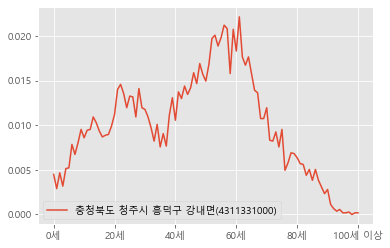

In [75]:
import pandas as pd
df = pd.read_csv('age.csv', encoding='cp949', index_col = 0)
#df.head()
df = df.div(df['2022년06월_계_총인구수'], axis=0)
del df['2022년06월_계_총인구수'], df["2022년06월_계_연령구간인구수"]
#print(df)
columns_name = []
for name in df.columns:
    columns_name.append(str(name).replace("2022년06월_계_",""))
df.columns = columns_name
indexs_name = []
for name in df.index:
    indexs_name.append( str(name).replace("제1동","1동") )
df.index = indexs_name
df.head()

#name = input("원하는 지역의 이름을 입력해주세요 : ")
name = "강내면"
a = df.index.str.contains(name)
#b = df.index.str.contains("구 \(")
#df2 = df[a & b]
df2 = df[a]
df2.head()
print(df2)
print(df2.T)
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")
plt.figure(figsize=(10,4),dpi=300)
plt.style.use('ggplot')
df2.T.plot()
plt.show()

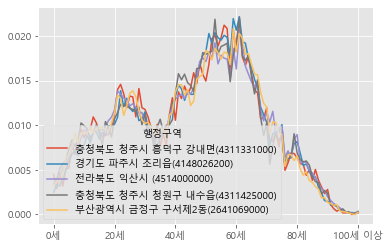

In [117]:
import pandas as pd
df = pd.read_csv('age.csv', encoding='cp949', index_col = 0)
#df.head()

df=df[df['2022년06월_계_총인구수']>0]

df = df.div(df['2022년06월_계_총인구수'], axis=0)
del df['2022년06월_계_총인구수'], df["2022년06월_계_연령구간인구수"]
#print(df)

columns_name = []
for name in df.columns:
    columns_name.append(str(name).replace("2022년06월_계_",""))
df.columns = columns_name
'''
indexs_name = []
for name in df.index:
    indexs_name.append( str(name).replace("제1동","1동") )
df.index = indexs_name
df.head()
'''
#name = input("원하는 지역의 이름을 입력해주세요 : ")
name = "강내면"
a = df.index.str.contains(name)
#b = df.index.str.contains("구 \(")
#df2 = df[a & b]
df2 = df[a]
df2.head()
#print(df2)
#print(df2.T)

# 제로 데이터인 자료 제거(결측치 데이터들)
#zerodatas = df.sum(axis=1) != 0
#df = df.loc[zerodatas]
# 미리 아래와 같은 코드를 실행하면 위와 같은 sum 작업을 안해도 된다!!! 전처리 단계서 작업할 것이 필요.
#df=df[df['2022년6월_계_총인구수']>0]

'''
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")
plt.figure(figsize=(10,4),dpi=300)
plt.style.use('ggplot')
df2.T.plot()
plt.show()
'''

import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")
df.loc[np.power(df.sub(df2.iloc[0], axis = 1), 2).sum(axis=1).sort_values().index[:5]].T.plot()
'''
x = df.sub(df2.iloc[0], axis = 1)
y = np.power(x, 2)
z = y.sum(axis=1)
i = z.sort_values().index[:5]
df.loc[i].T.plot()
'''
plt.show()
